# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNetCV,ElasticNet
%matplotlib inline

# 2. Collect and load data

In [2]:
a=pd.read_csv('C:/Users/lenovo/Desktop/SL-Reg/Mini Project/bigcity.csv')
a.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


In [3]:
col=['Serial.No','1920','1930']
a.columns=col

In [4]:
a.head()

,Serial.No,1920,1930
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


# 3. Explore numeric variables - five number summary

In [5]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
Serial.No    49 non-null int64
1920         49 non-null int64
1930         49 non-null int64
dtypes: int64(3)
memory usage: 1.3 KB


In [6]:
a.describe()

,Serial.No,1920,1930
count,49.00000,49.000000,49.000000
mean,25.00000,103.142857,127.795918
std,14.28869,104.405061,123.121211
min,1.00000,2.000000,46.000000
25%,13.00000,43.000000,58.000000
50%,25.00000,64.000000,79.000000
75%,37.00000,120.000000,130.000000
max,49.00000,507.000000,634.000000


In [7]:
a['1920'].max()

507

In [8]:
a['1930'].max()

634

In [9]:
## In 1920, the people population mean was 103.14 and in 1930, the people population mean was 127.79(In 1000's)
## In 1920, the minimum population was 2 and in 1930,the minimum population has increased to 46(In 1000's)
## In 1920, the maximum population was 507 and in 1930,the maximum population has increased to 634(In 1000's)

# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

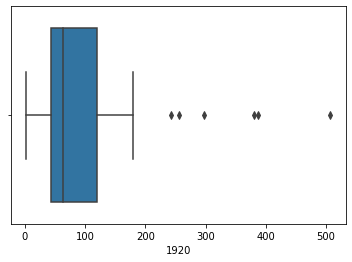

In [10]:
sns.boxplot(a['1920'])
plt.show()

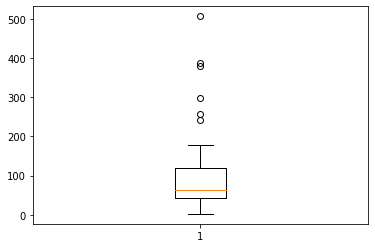

In [11]:
plt.boxplot(a['1920'])
plt.show()

In [12]:
q1=a['1920'].quantile(0.25)
q3=a['1920'].quantile(0.75)
iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr
print(iqr)
print(ul)
print(ll)

77.0
235.5
-72.5


In [13]:
a[a['1920']>ul]

,Serial.No,1920,1930
14,15,298,317
18,19,381,464
19,20,387,459
22,23,507,634
28,29,243,291
29,30,256,288


In [14]:
a[a['1920']<ll]

,Serial.No,1920,1930


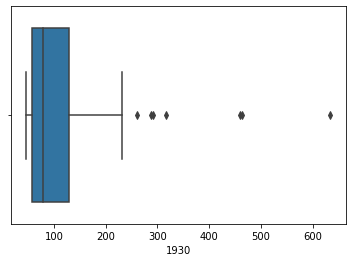

In [15]:
sns.boxplot(a['1930'])
plt.show()

In [16]:
q11=a['1930'].quantile(0.25)
q33=a['1930'].quantile(0.75)
iqr1=q33-q11
ul1=q33+1.5*iqr1
ll1=q11-1.5*iqr1
print(iqr1)
print(ul1)
print(ll1)

72.0
238.0
-50.0


In [17]:
a[a['1930']>ul1]

,Serial.No,1920,1930
3,4,179,260
14,15,298,317
18,19,381,464
19,20,387,459
22,23,507,634
28,29,243,291
29,30,256,288


In [18]:
a[a['1930']<ll1]

,Serial.No,1920,1930


# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

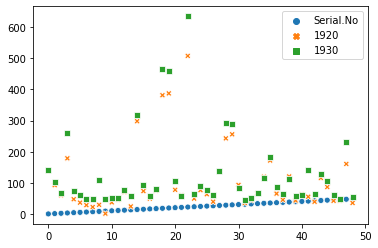

In [19]:
sns.scatterplot(data=a)
plt.show()

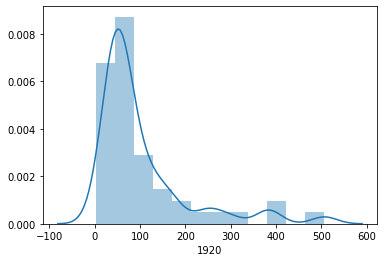

In [20]:
sns.distplot(a['1920'])
plt.show()

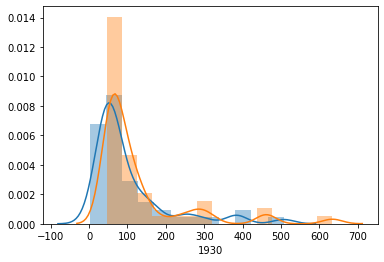

In [49]:
sns.distplot(a['1920'])
sns.distplot(a['1930'])
plt.show()

# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [22]:
a.isna().sum()

Serial.No    0
1920         0
1930         0
dtype: int64

In [23]:
a.corr()

,Serial.No,1920,1930
Serial.No,1.000000,-0.024788,-0.047890
1920,-0.024788,1.000000,0.981742
1930,-0.047890,0.981742,1.000000


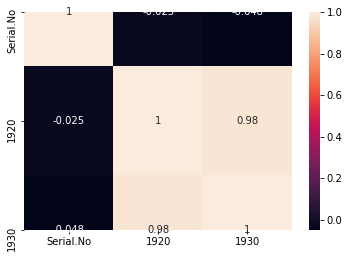

In [24]:
sns.heatmap(a.corr(),annot=True)
plt.show()

The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [25]:
newX=a.drop(['1930','Serial.No'],axis=1)
newY=a['1930']

In [26]:
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.2,random_state=3)

In [27]:
print(X_train.size)
print(X_train.shape)
print(y_train.size)
print(y_train.shape)

39
(39, 1)
39
(39,)


In [28]:
print(X_test.size)
print(X_test.shape)
print(y_test.size)
print(y_test.shape)

10
(10, 1)
10
(10,)


# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [29]:
lm=LinearRegression()
lm.fit(newX,newY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
lm.intercept_

8.383956333192671

In [31]:
lm.coef_

array([1.1577337])

In [32]:
list(zip(X_train.columns,lm.coef_))

[('1920', 1.1577337039322437)]

In [33]:
predicted_ir=lm.predict(X_train)

In [34]:
predicted_ir.dtype

dtype('float64')

In [35]:
y_train.count()

39

In [36]:
from sklearn.metrics import mean_absolute_error

In [37]:
mean_absolute_error(y_train,predicted_ir)

17.641147330429085

# Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
mean_squared_error(y_train,predicted_ir)

582.2609150280074

In [40]:
np.sqrt(mean_squared_error(y_train,predicted_ir))

24.130083195629627

In [41]:
from sklearn.metrics import r2_score

In [42]:
r2_score(y_train,predicted_ir)

0.9651054504647189

# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [47]:
predicted=lm.predict(X_test)

In [48]:
predicted

array([ 90.58304931,  59.32423931,  10.69942374,  58.1665056 ,
        50.06236967, 289.71324639,  37.32729893, 194.77908267,
       109.10678858,  41.95823375])